# KNN Model Training for Emotion Detection through Facial Recognition
This is the training module for detecting Emotions through Facial Recognition using K-Nearest Neighbors Algorithm.
It uses the generated dataset **model_training.csv** that was generated from the data processing module.


## Libraries

First, we have to import the necessary libraries.

In [1]:
#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Importing and Splitting the datasets

In [2]:
#importing the datasets
train_set = pd.read_csv('./outputs/train_set_ov2_no_mismatch.csv')
test_set = pd.read_csv('./outputs/test_set_ov2_no_mismatch.csv')

In [3]:
#Split into features and target; x = features, y = target
x_train = train_set.iloc[:, 1:]
y_train = train_set['label']

x_test = test_set.iloc[:, 1:]
y_test = test_set['label']

#combining test and train set for cross validation
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

## Training the model

We then train the KNN model using the training dataset with the number of neighbors as 3.

In [4]:
#Training the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Testing the model

After training, we can then test and evaluate the model through cross validation and using the test set

In [5]:
y_cross_scores = cross_val_score(knn, x, y, cv=5, scoring = 'accuracy')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (y_cross_scores.mean()*100, y_cross_scores.std()*100))

71.64% accuracy with a standard deviation of 4.91%


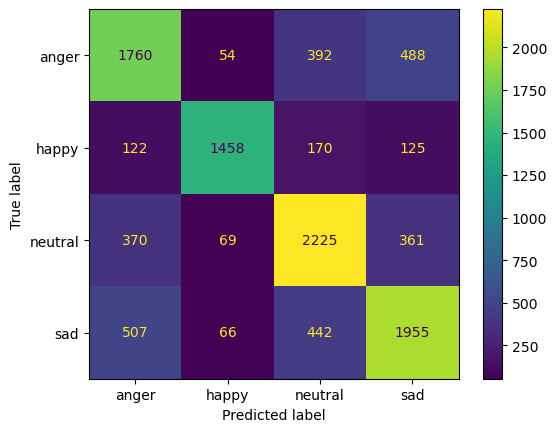

In [6]:
y_cross_predict = cross_val_predict(knn, x_train, y_train, cv = 5) 
y_cross_cm = confusion_matrix(y_train, y_cross_predict)
y_cross_display = ConfusionMatrixDisplay(confusion_matrix=y_cross_cm, display_labels=knn.classes_)
y_cross_display.plot()

In [7]:
y_pred = knn.predict(x_test)

In [8]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(knn.score(x_test, y_test) * 100))


The mean accuracy of the given test data and labels is: 64.77%


In [9]:
y_pred_accuracy = accuracy_score(y_test, y_pred)
y_pred_precision = precision_score(y_test, y_pred, average='macro')
y_pred_recall = recall_score(y_test, y_pred, average='macro')
y_pred_f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: ", y_pred_accuracy*100)
print("Precision: ", y_pred_precision*100)
print("Recall: ", y_pred_recall*100)
print("F1: ", y_pred_f1*100)


Accuracy:  64.77272727272727
Precision:  53.38633037533097
Recall:  55.410997233830614
F1:  53.05764749712119


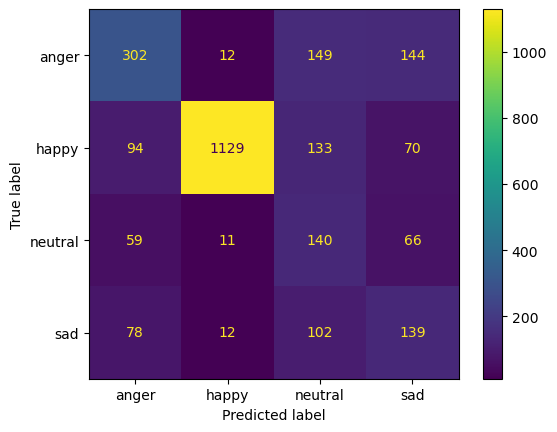

In [10]:
y_pred_cm = confusion_matrix(y_test, y_pred)
y_pred_display = ConfusionMatrixDisplay(confusion_matrix=y_pred_cm, display_labels=knn.classes_)
y_pred_display.plot()

# Hyperparameter Tuning

In [11]:
def knn_model(x_train, y_train, x_test, y_test, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

f1 = list()
accuracy = list()
precision = list()
recall = list()

x = range(1, 51)

for i in x:
    results = knn_model(x_train, y_train, x_test, y_test, i)
    accuracy.append(results[0])
    precision.append(results[1])
    recall.append(results[2])
    f1.append(results[3])

# Prepare the data
x = range(1, 51)
y_f1 = f1
y_accuracy = accuracy
y_precision = precision
y_recall = recall


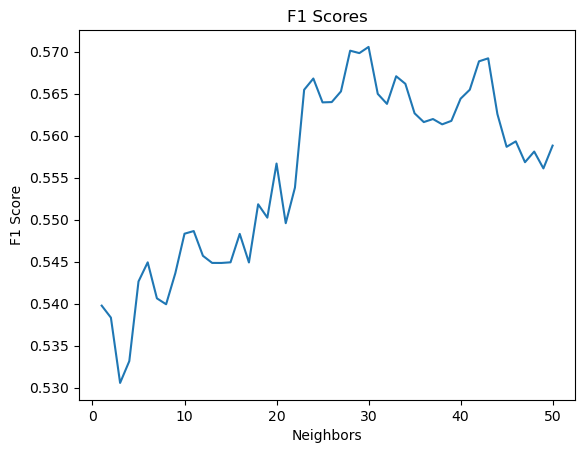

In [12]:
# Plot the F1 scores
plt.plot(x, y_f1)
plt.xlabel('Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Scores')
plt.show()

In [13]:
highest_f1_index = np.argmax(f1)
print("The highest F1 score is: ", f1[highest_f1_index] * 100, "% with ", highest_f1_index+1, " neighbors")


The highest F1 score is:  57.05649549069922 % with  30  neighbors


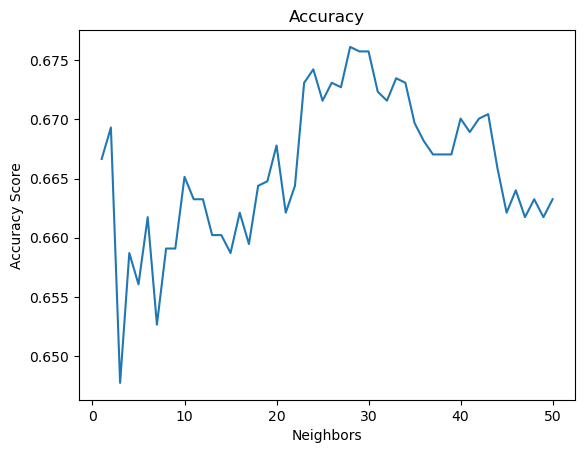

In [14]:
# Plot the accuracy scores
plt.plot(x, y_accuracy)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy')
plt.show()

In [15]:
highest_accuracy_index = np.argmax(accuracy)
print("The highest accuracy score is: ", accuracy[highest_accuracy_index] * 100, "% with ", highest_accuracy_index+1, " neighbors")

The highest accuracy score is:  67.61363636363636 % with  28  neighbors


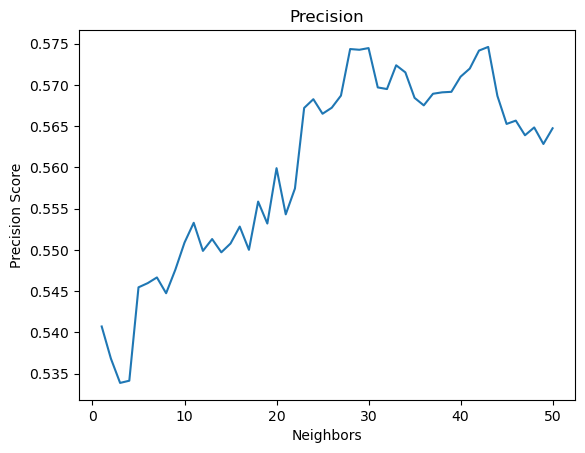

In [16]:
#Plot the precision scores
plt.plot(x, y_precision)
plt.xlabel('Neighbors')
plt.ylabel('Precision Score')
plt.title('Precision')
plt.show()

In [17]:
highest_precision_index = np.argmax(precision)
print("The highest precision score is: ", precision[highest_precision_index]*100, "% with ", highest_precision_index+1, " neighbors")

The highest precision score is:  57.45943363707714 % with  43  neighbors


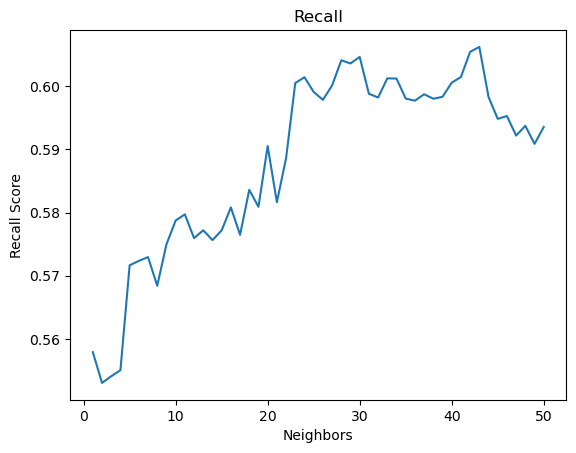

In [18]:
#Plot the recall scores
plt.plot(x, y_recall)
plt.xlabel('Neighbors')
plt.ylabel('Recall Score')
plt.title('Recall')
plt.show()

In [19]:
highest_recall_index = np.argmax(recall)
print("The highest recall score is: ", recall[highest_recall_index]*100, "% with ", highest_recall_index+1, " neighbors")

The highest recall score is:  60.62015838830575 % with  43  neighbors


In [38]:
tuned_knn = KNeighborsClassifier(n_neighbors=highest_accuracy_index+1)
tuned_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [39]:
tuned_y_cross_scores = cross_val_score(tuned_knn, x_train, y_train, cv=5, scoring = 'accuracy')
print("%0.2f%% accuracy with a standard deviation of %0.2f%%" % (tuned_y_cross_scores.mean()*100, tuned_y_cross_scores.std()*100))

60.00% accuracy with a standard deviation of 7.71%


In [40]:
external_set = pd.read_csv('./outputs/fer2013-set.csv')

In [41]:
x_external_test = external_set.iloc[:, 2:]
y_external_test = external_set['label']

In [42]:
x_external_test.head(5)

,lm_1_x,lm_1_y,lm_1_z,lm_2_x,lm_2_y,lm_2_z,lm_3_x,lm_3_y,lm_3_z,lm_4_x,...,lm_475_z,lm_476_x,lm_476_y,lm_476_z,lm_477_x,lm_477_y,lm_477_z,lm_478_x,lm_478_y,lm_478_z
0,0.585703,0.688364,-0.064108,0.604407,0.611852,-0.107075,0.595475,0.637442,-0.060910,0.589459,...,0.026336,0.726661,0.504794,0.026334,0.703628,0.516170,0.026315,0.721237,0.535993,0.026317
1,0.585008,0.693179,-0.064470,0.596085,0.613974,-0.101272,0.591876,0.642826,-0.058991,0.579412,...,0.033707,0.681771,0.432235,0.033705,0.661421,0.445278,0.033684,0.682200,0.460805,0.033689
2,0.582581,0.685064,-0.059101,0.596868,0.605721,-0.101935,0.591620,0.633278,-0.056890,0.578146,...,0.029698,0.700579,0.476738,0.029697,0.679697,0.492102,0.029677,0.697872,0.511779,0.029680
3,0.579330,0.688271,-0.064327,0.597474,0.610252,-0.108215,0.590104,0.634638,-0.061271,0.580531,...,0.027570,0.720929,0.483828,0.027570,0.697731,0.498512,0.027548,0.717202,0.519426,0.027551
4,0.585355,0.691295,-0.061211,0.605442,0.622365,-0.103344,0.599030,0.644038,-0.058966,0.585517,...,0.026568,0.706235,0.494809,0.026567,0.685281,0.509824,0.026547,0.704477,0.529498,0.026551


In [43]:
y_external_test.head(5)

0    angry
1    angry
2    angry
3    angry
4    angry
Name: label, dtype: object

In [44]:
y_external_pred = tuned_knn.predict(x_external_test)

In [45]:
print("The mean accuracy of the given test data and labels is: %0.2f%%" %(tuned_knn.score(x_external_test, y_external_test) * 100))

The mean accuracy of the given test data and labels is: 21.42%


In [46]:
y_external_pred_accuracy = accuracy_score(y_external_test, y_external_pred)
y_external_pred_precision = precision_score(y_external_test, y_external_pred, average='macro')
y_external_pred_recall = recall_score(y_external_test, y_external_pred, average='macro')
y_external_pred_f1 = f1_score(y_external_test, y_external_pred, average='macro')

print("Accuracy: ", y_external_pred_accuracy*100)
print("Precision: ", y_external_pred_precision*100)
print("Recall: ", y_external_pred_recall*100)
print("F1: ", y_external_pred_f1*100)

Accuracy:  21.421709894332373
Precision:  10.507855364552459
Recall:  17.89639290140493
F1:  9.315918478540445


c:\Users\Luis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Luis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
